In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Decision Trees

"""
Kök düğüm belirleme yöntemler,
1 - Entropy
2 - Information Gain
3 - Gini Inpurity

"""

In [2]:
dataset = pd.read_csv("../../Data/Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy" , random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
y_predict = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_predict)
cm

array([[61,  7],
       [ 3, 29]], dtype=int64)

In [10]:
from sklearn import tree

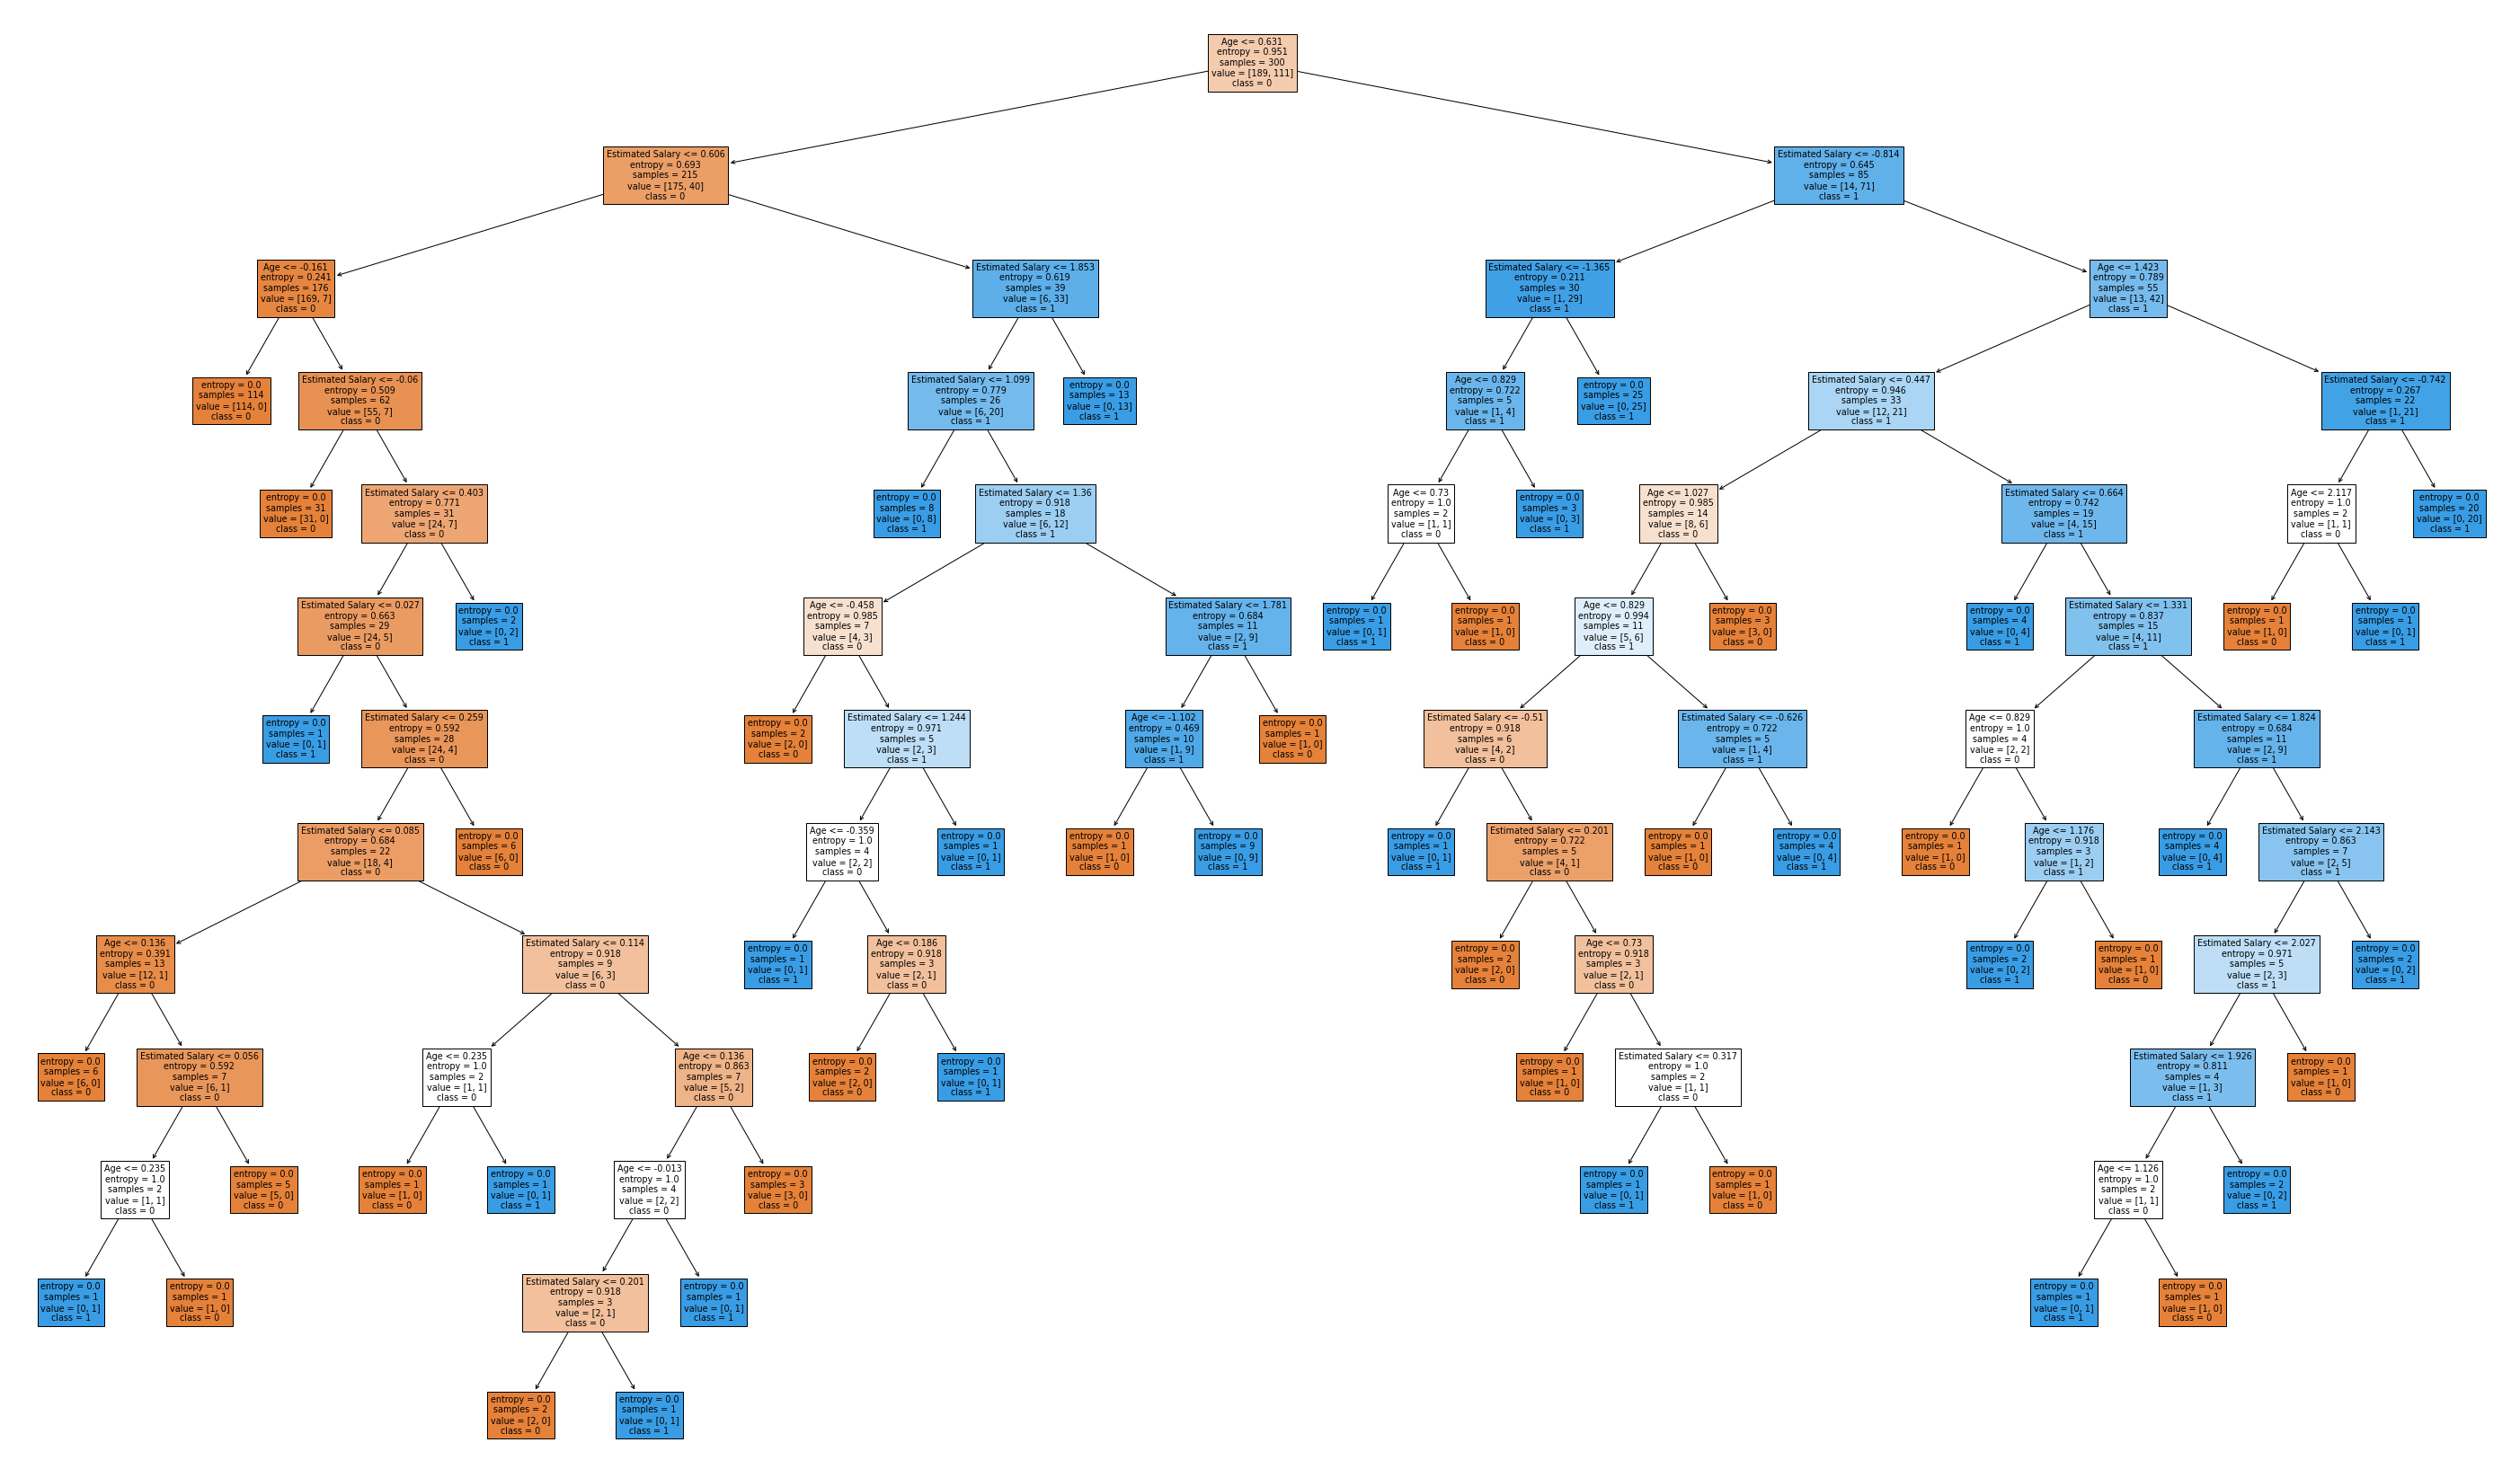

In [11]:
fn = ["Age" , "Estimated Salary"]
cn = ["0" , "1"]

fig , axes = plt.subplots(nrows = 1 , ncols=1 , figsize=(50, 30))
tree.plot_tree(classifier , feature_names=fn , class_names = cn , filled = True)
fig.savefig('AIUP_DT.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


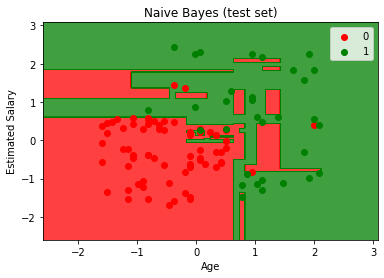

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [18]:
col_name = ["Pregnancies" , "Glucose" , "BloodPressure" , "Skin" , "Insulin" , "BMI" , "Pedigree" , "Age" , "Outcome"]
pima = pd.read_csv("../../Data/diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
X = pima.iloc[: , [0,1,2,3,4,5,6,7]].values
y = pima.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state=0)

In [22]:
clf = DecisionTreeClassifier()
clf.fit(X_train , y_train)

DecisionTreeClassifier()

In [23]:
y_pred = clf.predict(X_test) 

In [27]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
result = confusion_matrix(y_pred , y_test)
print(result)

[[103  28]
 [ 27  34]]


In [26]:
result1 = classification_report(y_test, y_pred)
print(result1)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       130
           1       0.56      0.55      0.55        62

    accuracy                           0.71       192
   macro avg       0.67      0.67      0.67       192
weighted avg       0.71      0.71      0.71       192



In [28]:
result2 = accuracy_score(y_test, y_pred)
print(result2)

0.7135416666666666


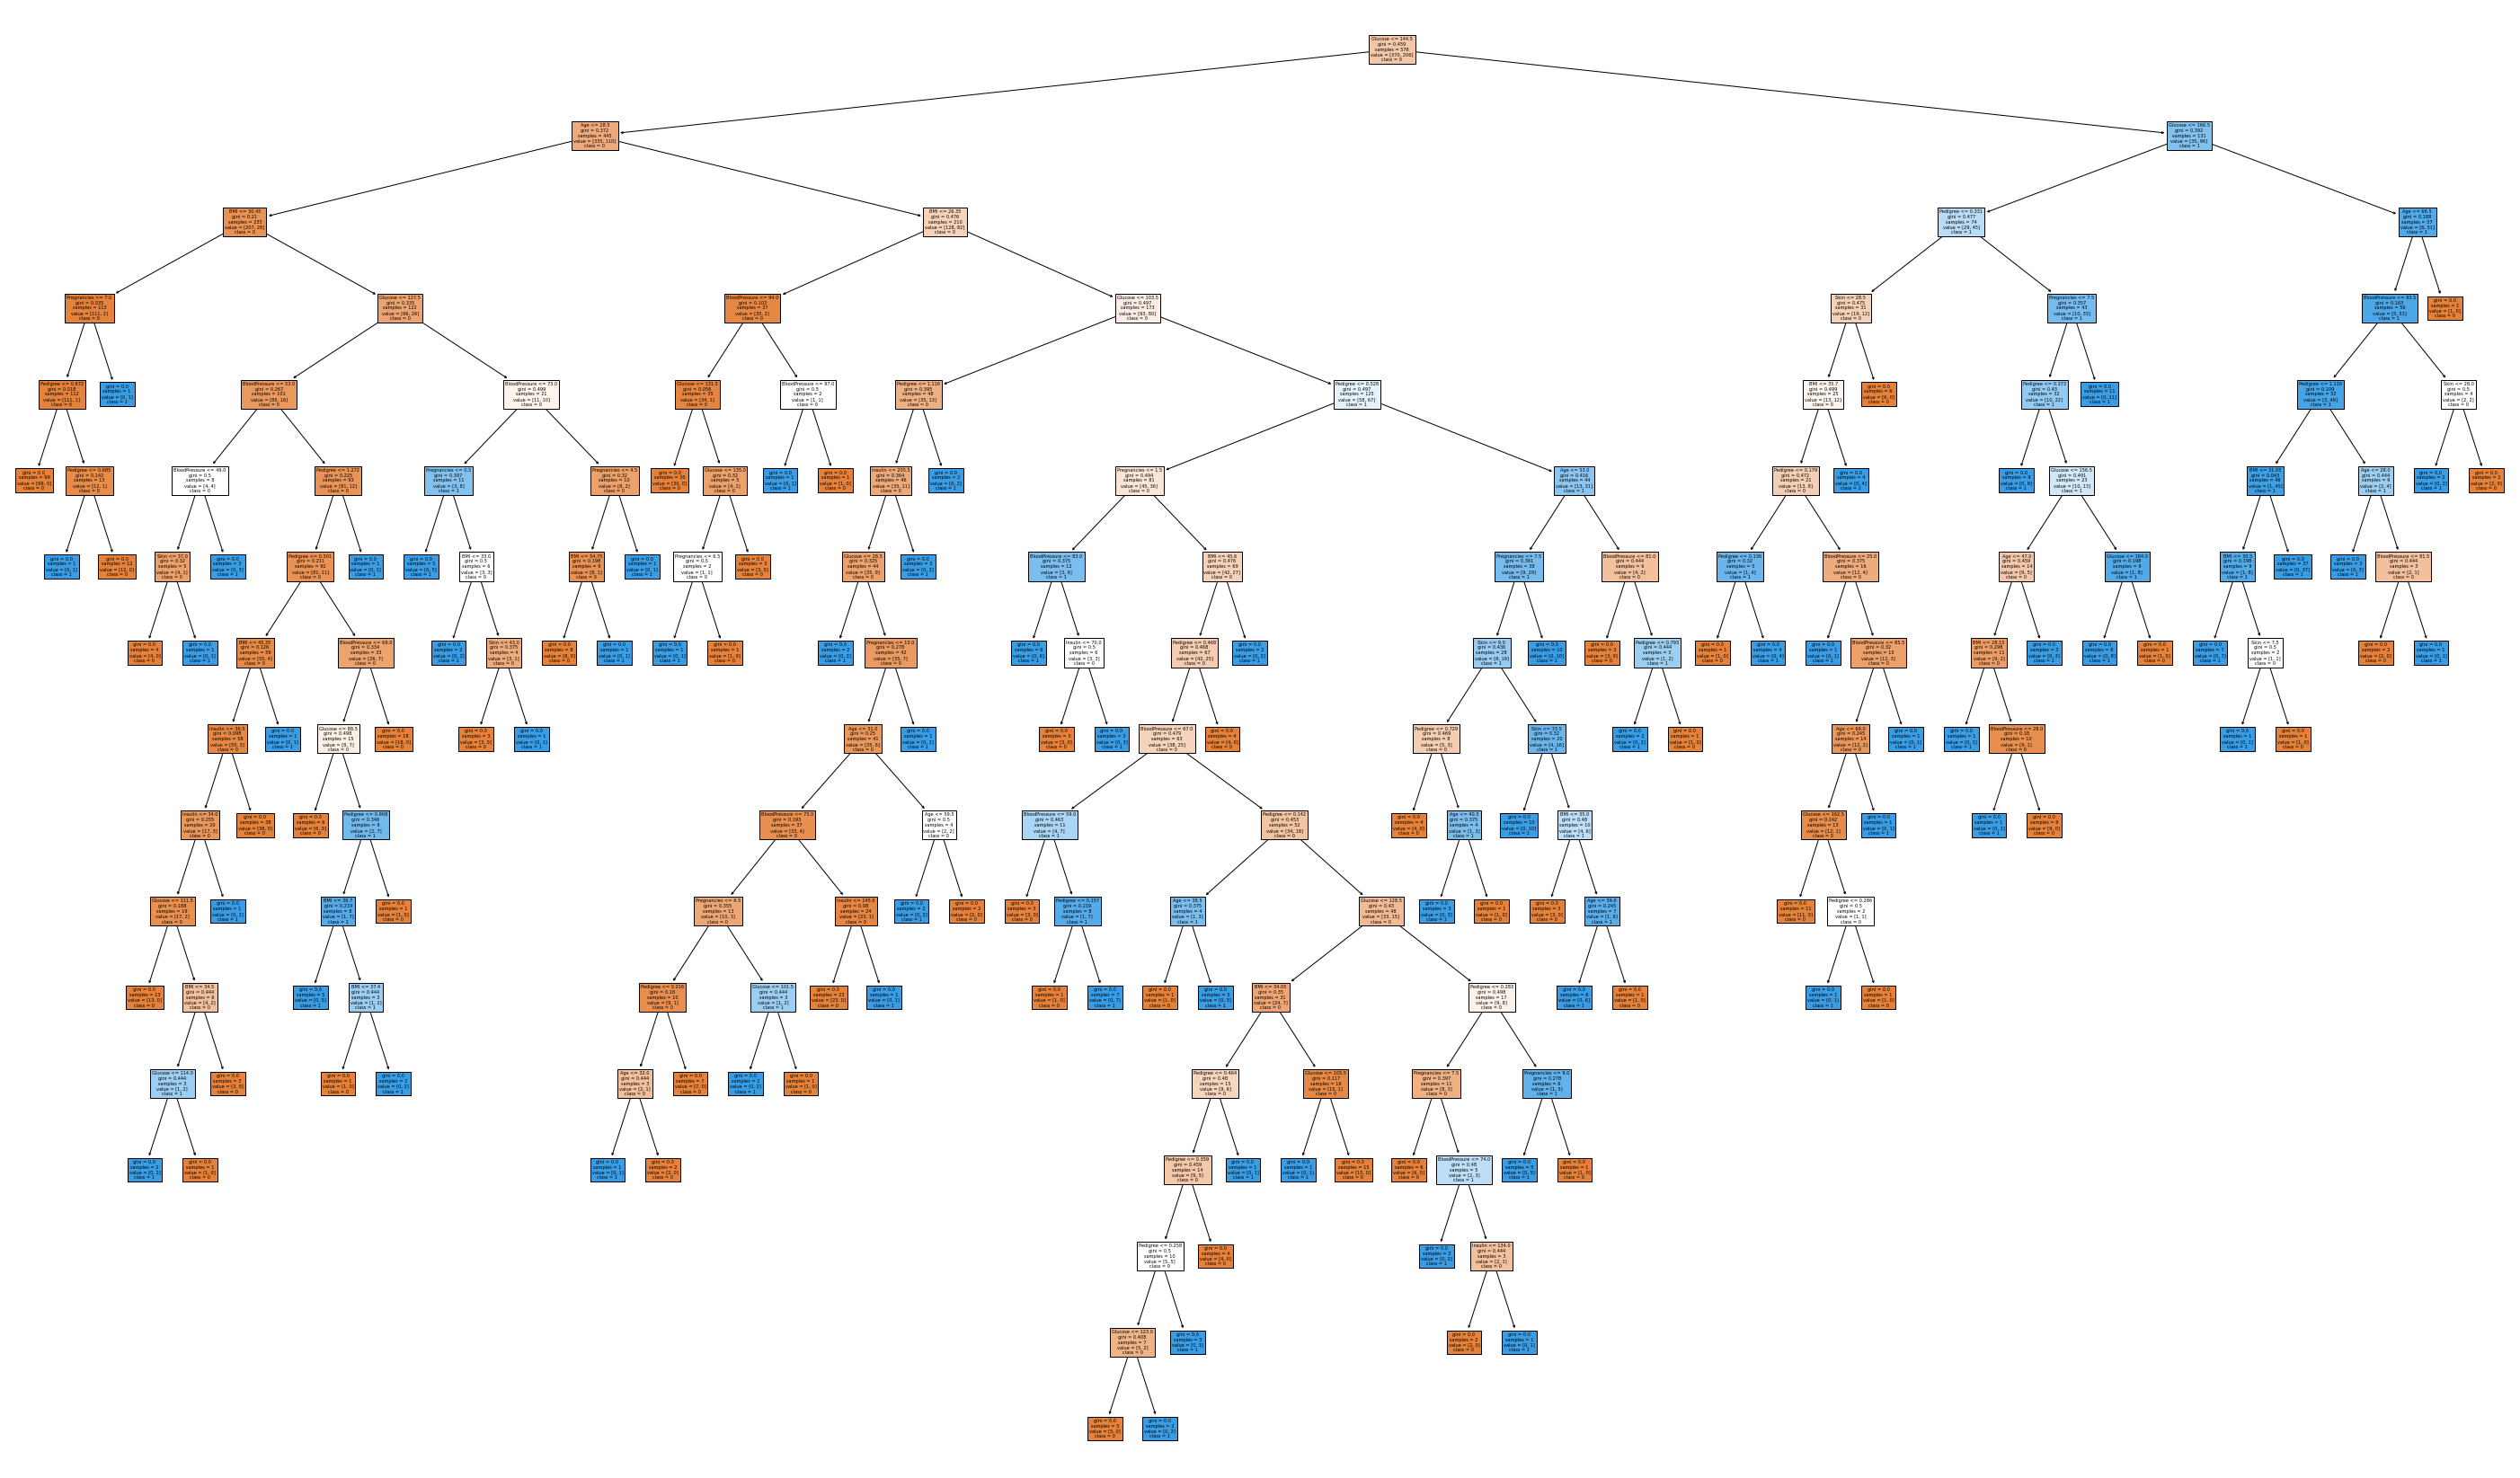

In [32]:
fn = ["Pregnancies" , "Glucose" , "BloodPressure" , "Skin" , "Insulin" , "BMI" , "Pedigree" , "Age" , "Outcome"]
cn = ["0" , "1"]

fig , axes = plt.subplots(nrows = 1 , ncols=1 , figsize=(50, 30))
tree.plot_tree(clf , feature_names=fn , class_names = cn , filled = True)
fig.savefig('AIUP_DT2.png')